# Cody Deleurme

## Research question/interests

What interests me most about this data is whether these high grossing movies are any better than less popular films. Going into this topic, I will admit that I am somewhat biased as I've seen dozens of films not contained in this dataset which I've rated an 8 out of 10 or higher. That being said, I will be fair and let the data speak for itself. I will be using a dataset of my own creation to examine the ratings of each of these films on Imdb, letterboxd, rottentomatoes, and rateyourmusic. If I have time, I would also like to compare and contrast my own ratings of some of these films to their aggregate ratings.

My research questions will be thus: **"Is there any relationship between the quality of a movie and its popularity? Also, is there any significant relationship between a movie's release year and its quality?"** 

## Methods

To answer this research question, I will be using 3 different aggregate rating scores from 3 different locations. These locations are as follows:
 - Imdb weighted average rating out of 10
 - Letterboxd weighted average rating out of 5 stars
 - RateYourMusic weighted average rating out of 5 stars
 
Credits go to:
 - [Sonemic]("Sonemic.com") for the RateYourMusic data
 - [IMDb]("Imdb.com") for the IMDb data
 - [Letterboxd]("Letterboxd.com") for the Letterboxd data

### How are these ratings aggregated?
In order to properly understand my analysis, it is important that we understand how each of these sites aggregates their ratings because they have significant differences.

#### Imdb
Imdb uses a simple weighted average system to give movies a score out of 10 rounded to one decimal place. Not every rating is equal on Imdb. According to the website, when users with unusual voting activity are detected, their rating is given a lesser weight to the overall score. This is to prevent 'review-bombing' or abuse of the system.

#### Letterboxd
Letterboxd uses a similar system to Imdb, except that it has a 10 point scale where you can rate things from 0.5 stars to 5 stars. Also, one other key difference is that Letterboxd attempts to account for low sample size by weighting down films with low numbers of ratings.

#### RateYourMusic (films)
RateYourMusic (aka RYM) uses a weighted average system which rewards users who actively participate on the website. The rating scale is a 5 star system, but a 10 point scale, like Letterboxd. Again, not all ratings equally contribute to the final score. Users who sign up and leave a few ratings on the website are weighted less (~0.5) than users who actively participate (~1). Users who abuse the system are given a near-zero weighting (~0). One interesting caveat of RYM is that they actually give a small bonus to someone's weighting if they not only rate a movie, but also leave a review (~1.25).

### What assumptions will I make?

In this analysis, I will be converting every aggregate score to a rating out of 10, rounded to 2 decimal places. I will follow RottenTomatoes' audience score assumption and assume that an 'average' movie is one that is a 6/10. This seems to be reasonable as the other 3 websites have a minimum rating of 1/10 or 0.5/5 with a maximum rating of 10 or 5, implying an arithemetic mean of 6/10 or 3/5. To account for uncertainty and inaccuracies in ratings, as well as differences in the subjective rating scales of individual moviegoers, I will expand the definition of an 'average' movie to be any movie rated between 5.50 and 6.49 inclusive. Any movie rated 6.50 or above will be considered 'good', whereas any movie rated 5.49 or below will be considered 'bad'. Amongst the 'good' movies, I will make the further distinction that a movie rated 8.00 or higher is 'great'.

#### In summary

 - 0 - 5.49 = Bad
 - 5.50 - 6.49 = Average
 - 6.50 - 10.00 = Good
    - 8.00 - 10.00 = Great

### How will I conduct this analysis?

I will first analyze the rating data by using a weighted average of all 5 ratings sources, then I will do an individual analysis of the scores for each website. I expect the initial analysis will give a solid holistic view of the overall movie quality, whereas the individual analysis will help explain variation in ratings from different sites.

## Data Analysis



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/Movie Aggregate Rating Data Final.csv")
# This is a dataset of my own creation. All data in this set was manually obtained and entered by myself.

## M4 Task 1

In [2]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.dropna(subset = ['Imdb', 'Rateyourmusic', 'Letterboxd'])

df[['Imdb', 'Imdb Sample Size']] = df['Imdb'].str.split(' ', 1, expand=True)
df[['RYM', 'RYM Sample Size']] = df['Rateyourmusic'].str.split(' ', 1, expand=True)
df[['Letterboxd', 'Letterboxd Sample Size']] = df['Letterboxd'].str.split(' ', 1, expand=True)
df[['Title', 'Release Year']] = df['Title'].str.split('(', 1, expand=True)
df = df.drop(columns = ['Rateyourmusic'])
df[['Imdb Sample Size', 'RYM Sample Size', 'Letterboxd Sample Size', 'Release Year']] = df[['Imdb Sample Size', 'RYM Sample Size', 'Letterboxd Sample Size', 'Release Year']].replace(r'[^\w\s]|_', '', regex=True)
# cleaning up data and seperating thigns into proper columns

# need to standardize ratings to properly compare
df = df.apply(pd.to_numeric, errors = 'ignore')
df['RYM'] = df['RYM'].apply(lambda x: x*2)
df['Letterboxd'] = df['Letterboxd'].apply(lambda x: x*2)
df.head()

C:\Users\deleu\AppData\Local\Temp\ipykernel_6764\700068517.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Imdb', 'Imdb Sample Size']] = df['Imdb'].str.split(' ', 1, expand=True)
C:\Users\deleu\AppData\Local\Temp\ipykernel_6764\700068517.py:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['RYM', 'RYM Sample Size']] = df['Rateyourmusic'].str.split(' ', 1, expand=True)
C:\Users\deleu\AppData\Local\Temp\ipykernel_6764\700068517.py:6: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Letterboxd', 'Letterboxd Sample Size']] = df['Letterboxd'].str.split(' ', 1, expand=True)
C:\Users\deleu\AppData\Local\Temp\ipykernel_6764\700068517.py:7: FutureWarning: In a future version of pandas all arguments of StringMethods.

,Title,Imdb,Letterboxd,Imdb Sample Size,RYM,RYM Sample Size,Letterboxd Sample Size,Release Year
0,Star Wars: Episode VII - The Force Awakens,7.8,6.82,936432.0,6.06,7496.0,802884.0,2015
1,Avengers: Endgame,8.4,7.84,1143197.0,6.50,5091.0,1131629.0,2019
2,Avatar,7.9,7.06,1315981.0,5.42,7624.0,814160.0,2009
3,Black Panther,7.3,7.48,781423.0,5.94,4535.0,1112607.0,2018
4,Avengers: Infinity War,8.4,8.00,1091599.0,6.86,5540.0,1180128.0,2018


## M4 Task 3

First we will define a column called "Weighted Score". This takes the average rating out of ten for each movie from the three websites.

In [3]:
df['Weighted Rating'] = df['RYM'] + df['Imdb'] + df['Letterboxd']
df['Weighted Rating'] = df['Weighted Rating'].apply(lambda x: x/3) #taking the average to get weighted rating
df

,Title,Imdb,Letterboxd,Imdb Sample Size,RYM,RYM Sample Size,Letterboxd Sample Size,Release Year,Weighted Rating
0,Star Wars: Episode VII - The Force Awakens,7.8,6.82,936432.0,6.06,7496.0,802884.0,2015,6.893333
1,Avengers: Endgame,8.4,7.84,1143197.0,6.50,5091.0,1131629.0,2019,7.580000
2,Avatar,7.9,7.06,1315981.0,5.42,7624.0,814160.0,2009,6.793333
3,Black Panther,7.3,7.48,781423.0,5.94,4535.0,1112607.0,2018,6.906667
4,Avengers: Infinity War,8.4,8.00,1091599.0,6.86,5540.0,1180128.0,2018,7.753333
...,...,...,...,...,...,...,...,...,...
444,Live Free or Die Hard,7.1,5.76,NaN,5.36,NaN,NaN,2007,6.073333
445,Wanted,6.7,5.90,NaN,4.74,NaN,NaN,2008,5.780000
446,Identity Thief,5.7,4.88,NaN,4.14,NaN,NaN,2013,4.906667
447,Superman,7.4,7.26,NaN,6.26,NaN,NaN,1978,6.973333


### Scatterplots

The first visualization is a scatterplot showing the relationship between IMDb ratings and Rateyourmusic ratings.

From this graph, we can make two observations:
1. Ratings on Imdb and RYM have a high correlation, which could possibly be linear.
2. Ratings on Imdb tend to be significantly higher on average than on RYM

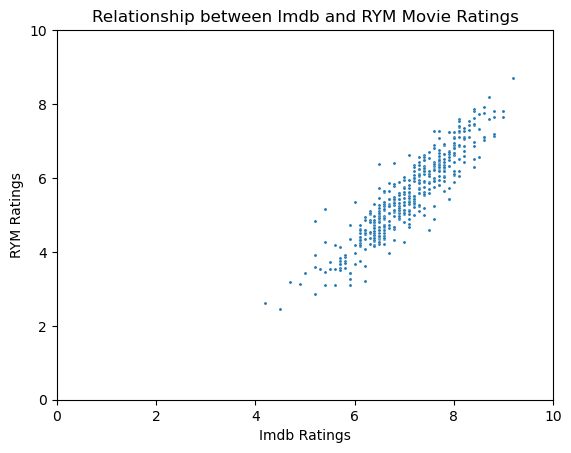

In [4]:
# I am setting the limits of this plot to be between 0 and 10 on both axes to reflect the minimum and maximum rating values.
# The reason I am doing this is to clearly show the differences in average ratings on the two sites.
plt.ylim(0,10)
plt.xlim(0,10)
plot1 = sns.scatterplot(data = df, x = 'Imdb', y = 'RYM', s = 5).set(title = 'Relationship between Imdb and RYM Movie Ratings', xlabel = 'Imdb Ratings', ylabel = 'RYM Ratings')

The second visualization is a pair plot which compares relationships between each of the four variables of interest.
From this plot, we can make the following observations:
 - Ratings are positively correlated across all websites
 - Rateyourmusic tends to have the lowest average rating
 - Letterboxd seems to have the most 'normal' distribution
 - IMDb tends to be the most negatively skewed distribution, with very few observations lower than a 6/10

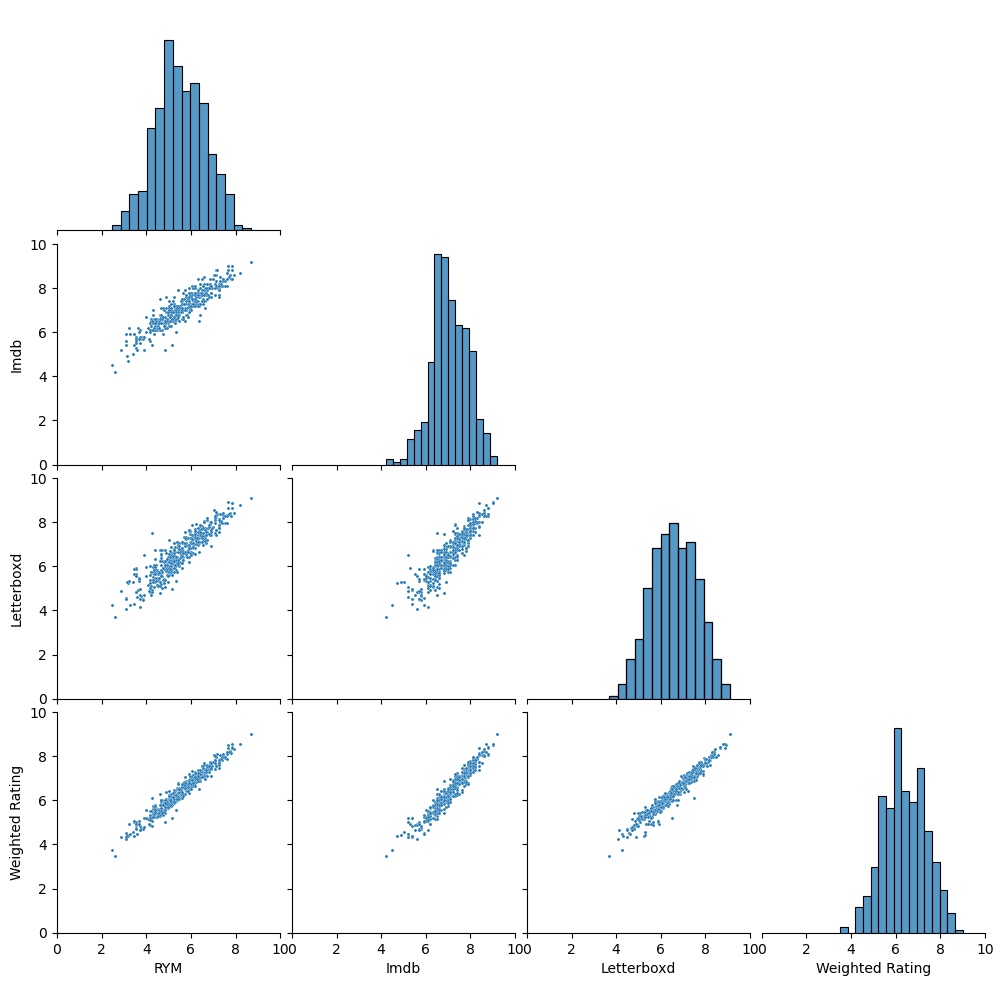

In [5]:
pplot = sns.pairplot(data = df, x_vars = ['RYM', 'Imdb', 'Letterboxd', 'Weighted Rating'],
             y_vars = ['RYM', 'Imdb', 'Letterboxd', 'Weighted Rating'],
             corner = True, plot_kws={'s': 5}).set(xlim=(0,10), ylim = (0,10))

This gives us a good idea of how ratings differ across these websites. That being established, we will now directly examine Weighted Rating.

### Boxplot and Summary Statistics

Starting with this box plot and these summary statistics represented on the box plot, we can make a few observations about Weighted Rating.
1. The median of Weighted Rating is 6.33, implying that, by our definition of Good, Bad, and Average, 50% or higher of observations are Average or Bad.
2. Quartile 1 is at 5.71/10. This implies that 25% of observations are below this rating.
3. Quartile 3 is 7.09/10. This implies that 25% of observations are above this rating.
4. 50% of observations fall between 5.71 and 7.09, meaning that the majority of movies from this dataset are by definition, Average or Good.
5. The mean (6.39) of Weighted Rating is slightly higher than the median (6.33). This implies that the distribution of Weighted Rating has a slight skew to the right.
6. The standard deviation is ~0.96.

[Text(0.5, 1.0, 'Box Plot of Weighted Rating out of 10 for Imdb and RYM'), Text(0.5, 0, 'Weighted Rating (0-10 Scale)')]


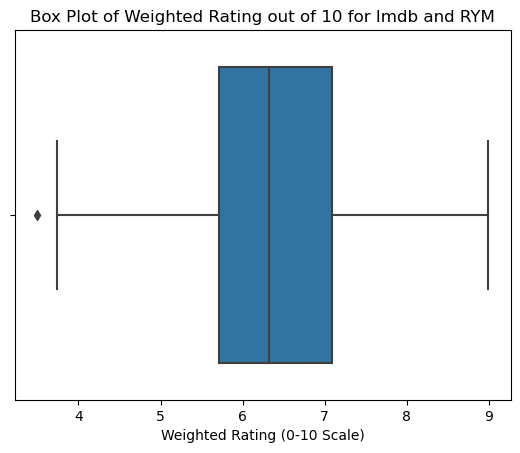

In [6]:
plot2 = sns.boxplot(data = df, x = 'Weighted Rating').set(title = 'Box Plot of Weighted Rating out of 10 for Imdb and RYM', xlabel = 'Weighted Rating (0-10 Scale)')
print(plot2)

In [7]:
df['Weighted Rating'].describe()

count    449.000000
mean       6.391017
std        0.954707
min        3.500000
25%        5.706667
50%        6.326667
75%        7.093333
max        8.993333
Name: Weighted Rating, dtype: float64


### Histograms

Now we will look at a few frequency distributions of Weighted Rating to see how many observations fall into each bucket.

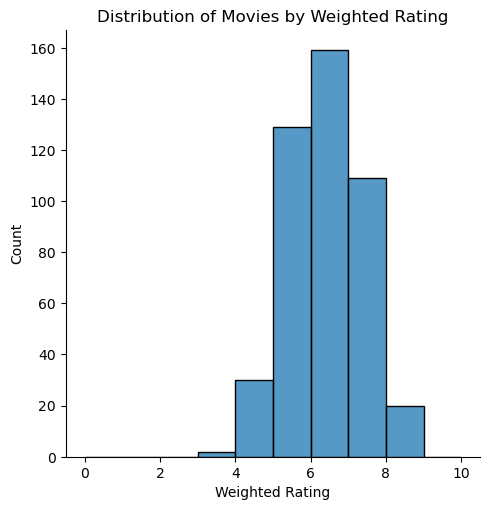

In [8]:
# Let us put Weighted Rating into a histogram to get a clearer sense of its distribution
rating_bins = pd.Series(np.arange(0, 11, 1)) 
# Above code creates a series of cutoff points which we can easily adjust to see the frequency of a movie having a Weighted Rating within specific ranges
plot3 = sns.displot(data = df, x = 'Weighted Rating', bins = rating_bins).set(title = 'Distribution of Movies by Weighted Rating')

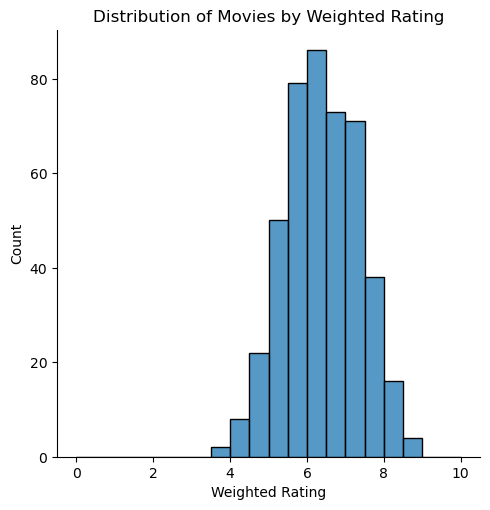

In [9]:
rating_bins = pd.Series(np.arange(0, 10.5, 0.5)) 
plot3 = sns.displot(data = df, x = 'Weighted Rating', bins = rating_bins).set(title = 'Distribution of Movies by Weighted Rating')

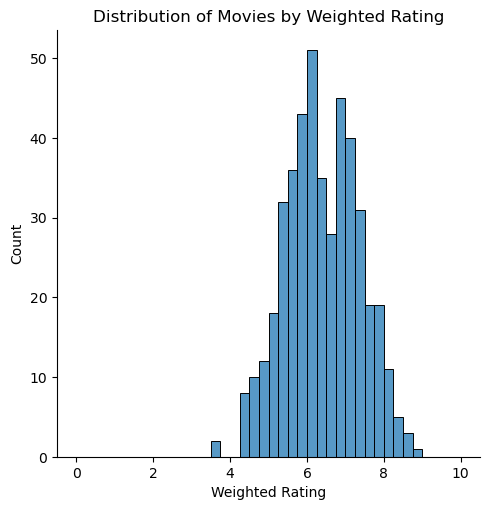

In [10]:
rating_bins = pd.Series(np.arange(0, 10.25, 0.25))
plot3 = sns.displot(data = df, x = 'Weighted Rating', bins = rating_bins).set(title = 'Distribution of Movies by Weighted Rating')


As we can see, Weighted Ratings are clustered heavily around the 5 to 7.99 range. When we look closer on the following histograms, we see that they are especially frequent around the 5.25 to 6.49 range, with a small dip, and then continue to be frequent in the 6.75 to 7.49 range. This is interesting because it could potentially imply that our distribution is bimodal. However, to determine whether this distribution is actually bimodal would require additional analysis. 

### Histogram of Quality

Now, let's assign a quality value based on the conditions specified earlier. This function iterates through each Weighted Rating and assigns a movie 'Good', 'Bad', 'Average', or 'Great' based on this score.

In [11]:
def cat(x):
    if x <= 5.49:
        return 'Bad'
    if x > 5.49 and x < 6.5 :
        return 'Average'
    if x >= 6.5 and x < 8 :
        return 'Good'
    return 'Great'


df['Quality'] = df['Weighted Rating'].apply(lambda x: cat(x))
df.head()

,Title,Imdb,Letterboxd,Imdb Sample Size,RYM,RYM Sample Size,Letterboxd Sample Size,Release Year,Weighted Rating,Quality
0,Star Wars: Episode VII - The Force Awakens,7.8,6.82,936432.0,6.06,7496.0,802884.0,2015,6.893333,Good
1,Avengers: Endgame,8.4,7.84,1143197.0,6.50,5091.0,1131629.0,2019,7.580000,Good
2,Avatar,7.9,7.06,1315981.0,5.42,7624.0,814160.0,2009,6.793333,Good
3,Black Panther,7.3,7.48,781423.0,5.94,4535.0,1112607.0,2018,6.906667,Good
4,Avengers: Infinity War,8.4,8.00,1091599.0,6.86,5540.0,1180128.0,2018,7.753333,Good


Next, we will make a histogram to see how many movies fall into each category.

As we can see, 'Average' and 'Good' movies are most common, with 'Bad' and 'Great' movies being significantly rarer by contrast.
This histogram would suggest that high grossing movies tend to be better than the average (6.0/10) movie.

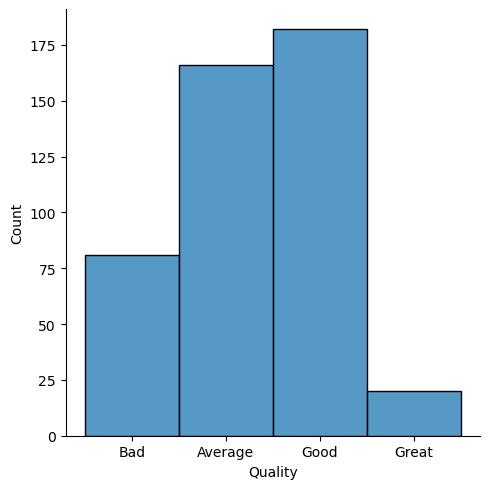

In [12]:
order = ['Bad', 'Average', 'Good', 'Great']
df['Quality'] = pd.Categorical(df['Quality'], categories=order)
qualityplot = sns.displot(data = df, x = 'Quality')

### Conclusion to Research Question 1

Based on what we have observed in the above graphs, there does appear to be some correlation between a movie's popularity and its quality. By our definitions of what a good, bad, and average movie are, we see that more than half of our observations are on the high end of average, or are good. 

## Release Year

Let us address our other research question, whether release year is significantly correlated with weighted rating.

There appears to be a gradual downwards trend in expected weighted rating as we approach the current year. Note however that there tend to be fewer data points as you go further away from the current year. This is probably due in large part because the original dataset for high grossing movies is not inflation-adjusted. This results in a higher representation of newer movies. It may very well be the case that we only see this downward trend because only the better movies from older decades accrued enough nominal revenue to be represented in this dataset. It would be interesting to see whether this trend still exists if this dataset was adjusted for inflation.

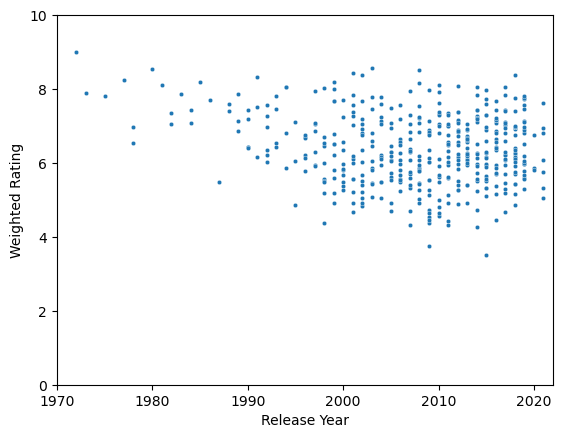

In [13]:
plt.ylim(0,10)
plt.xlim(1970, 2022) #this range eliminates the single outlier from the pre-40s
plot4 = sns.scatterplot(data = df, x = 'Release Year', y = 'Weighted Rating', s = 10)

Does it really have a downward trend though? Let us shorten the year range to only movies released in or after 2000.

With the range shortened, we see that in years where there is more data, the relationship between release year and quality seems much more unclear. My conclusion is that the correlation between release year and quality is most likely not as significant as it may appear in the first graph.

([<matplotlib.axis.XTick at 0x18b1686f910>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

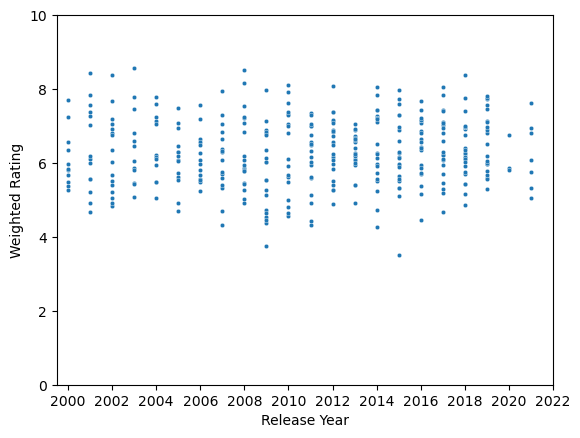

In [14]:
plt.ylim(0,10)
plt.xlim(1999.5, 2022) #this range is used to show how much inflation skews the original graph
plot4 = sns.scatterplot(data = df, x = 'Release Year', y = 'Weighted Rating', s = 10)
plt.xticks(np.arange(2000, 2023, 2))